In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
genome_scores = pd.read_csv("genome-scores.csv")
genome_scores

,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775
3,1,4,0.09675
4,1,5,0.14675
...,...,...,...
11709763,131170,1124,0.58775
11709764,131170,1125,0.01075
11709765,131170,1126,0.01575
11709766,131170,1127,0.11450


In [5]:
genome_tags = pd.read_csv("genome-tags.csv", index_col="tagId")
genome_tags

,tag
tagId,
1,007
2,007 (series)
3,18th century
4,1920s
5,1930s
...,...
1124,writing
1125,wuxia
1126,wwii


In [6]:
links = pd.read_csv("links.csv")
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
27273,131254,466713,4436.0
27274,131256,277703,9274.0
27275,131258,3485166,285213.0
27276,131260,249110,32099.0


In [7]:
movies = pd.read_csv("movies.csv")
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [8]:
ratings = pd.read_csv("ratings.csv")
ratings

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
...,...,...,...,...
20000258,138493,68954,4.5,1258126920
20000259,138493,69526,4.5,1259865108
20000260,138493,69644,3.0,1260209457
20000261,138493,70286,5.0,1258126944


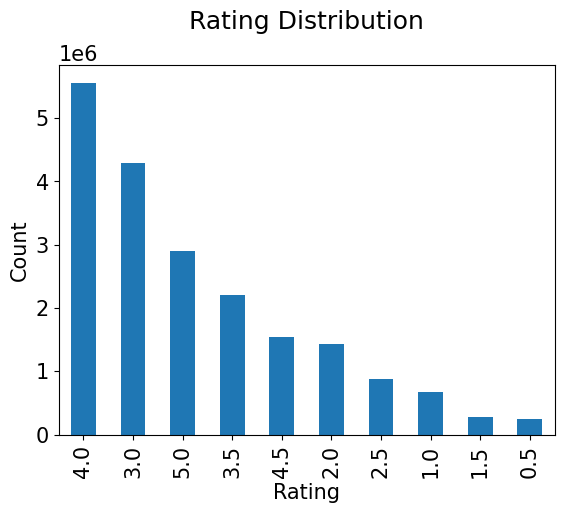

In [9]:
plt.rc("font", size=15)
ratings.rating.value_counts(sort=True).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [10]:
tags = pd.read_csv("tags.csv")
tags

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078
...,...,...,...,...
465559,138446,55999,dragged,1358983772
465560,138446,55999,Jason Bateman,1358983778
465561,138446,55999,quirky,1358983778
465562,138446,55999,sad,1358983772


In [11]:
Files = [genome_scores, genome_tags, links, movies, ratings, tags]
Files_name = ["genome_scores","genome_tags", "links", "movies", "ratings", "tags"]
L = len(Files)

$\textbf{Checking for missing values:}$

In [12]:
for file_index in range(L):
    if Files[file_index].isnull().sum().sum()!=0:
        initial_range = len(Files[file_index])
        Files[file_index] = Files[file_index].dropna()
        final_range = len(Files[file_index])
        rows_removed = str(-final_range + initial_range)
        print(rows_removed + " rows containing missing values have been removed from the file" + Files_name[file_index] +'.')
    else:
        print("The file " + Files_name[file_index] + " has no rows containing missing values.")

The file genome_scores has no rows containing missing values.
The file genome_tags has no rows containing missing values.
252 rows containing missing values have been removed from the filelinks.
The file movies has no rows containing missing values.
The file ratings has no rows containing missing values.
16 rows containing missing values have been removed from the filetags.


$\textbf{Removing Duplicates:}$

In [13]:
for file_index in range(L):
    if Files[file_index].duplicated().sum()!=0:
        initial_range = len(Files[file_index])
        Files[file_index] = Files[file_index].drop_duplicates()
        final_range = len(Files[file_index])
        rows_removed = str(-final_range + initial_range)
        print(rows_removed + " duplicated rows have been removed from the file" + Files_name[file_index] +'.')
    else:
        print("The file " + Files_name[file_index] + " has no duplicated rows.")

The file genome_scores has no duplicated rows.
The file genome_tags has no duplicated rows.
The file links has no duplicated rows.
The file movies has no duplicated rows.
The file ratings has no duplicated rows.
The file tags has no duplicated rows.


$\textbf{Removing Outliers or unexpected values:}\\$
We can:
- remove outliers from the relevance column of the genome_scores dataframe.
- remove values negative values and values greater than 5 from the ratings dataframe.
- remove the rows with "(no genres listed)" as value for the genre column of the movies dataframe.

In [14]:
genome_scores.describe()["relevance"]

count    1.170977e+07
mean     1.164833e-01
std      1.542463e-01
min      2.500000e-04
25%      2.425000e-02
50%      5.650000e-02
75%      1.415000e-01
max      1.000000e+00
Name: relevance, dtype: float64

The maximum value and minimum value of relevance are respectively almost 0 and 1. We are going to normalize this column.

In [15]:
print("There are " + str(int(ratings[ratings["rating"]>5]["rating"].sum())) + " value greater than 5.")
print("There are " + str(int(ratings[ratings["rating"]<0]["rating"].sum())) + " negative values.")

There are 0 value greater than 5.
There are 0 negative values.


We do not have to remove rows from the rating column as there are not outliers. However, we will normalize this column.

In [16]:
print( "There are " + str(movies[movies["genres"]=="(no genres listed)"]["genres"].count()) + " rows without an attributed genre.")
movies = movies[movies["genres"]!="(no genres listed)"]
movies[movies["genres"]=="(no genres listed)"]["genres"].count()

There are 246 rows without an attributed genre.


0

$\textbf{Normalizing data:}\\$

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

genome_scores['relevance'] = scaler.fit_transform(genome_scores[['relevance']])
ratings['rating'] = scaler.fit_transform(ratings[['rating']])
ratings['timestamp'] = scaler.fit_transform(ratings[['timestamp']])
tags['timestamp'] = scaler.fit_transform(tags[['timestamp']])